<a href="https://colab.research.google.com/github/rizalr04/FinalProjectKD/blob/main/ProdukOlahanIkan_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Produk Olahan Ikan
Dataset produk olahan ikan terdiri dari

*   ID
*   ProvinsiID
*   NamaProvinsi
*   Wilayah
*   JenisOlahan
*   JenisPerairan
*   Tahun
*   Volume
*   OlahanID



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
poi = pd.read_csv('produkolahanikan.csv')
poi.head()

,ID,ProvinsiID,NamaProvinsi,Wilayah,JenisOlahan,JenisPerairan,Tahun,Volume,OlahanID
0,1,11,Aceh,Sumatera,semua,Laut,2001,8640,0
1,2,12,Sumatera Utara,Sumatera,semua,Laut,2001,151576,0
2,3,13,Sumatera Barat,Sumatera,semua,Laut,2001,17831,0
3,4,14,Riau,Sumatera,semua,Laut,2001,52833,0
4,5,21,Kepulauan Riau,Sumatera,semua,Laut,2001,0,0


In [3]:
poi.isna().sum()

ID               0
ProvinsiID       0
NamaProvinsi     0
Wilayah          0
JenisOlahan      0
JenisPerairan    0
Tahun            0
Volume           0
OlahanID         0
dtype: int64

In [4]:
poi.dtypes

ID                int64
ProvinsiID        int64
NamaProvinsi     object
Wilayah          object
JenisOlahan      object
JenisPerairan    object
Tahun             int64
Volume            int64
OlahanID          int64
dtype: object

In [5]:
poi=poi.loc[poi['JenisOlahan'] != 'semua']
poi.head()

,ID,ProvinsiID,NamaProvinsi,Wilayah,JenisOlahan,JenisPerairan,Tahun,Volume,OlahanID
363,364,11,Aceh,Sumatera,ikan kering/asin,Laut,2001,8105,1
364,365,12,Sumatera Utara,Sumatera,ikan kering/asin,Laut,2001,82948,1
365,366,13,Sumatera Barat,Sumatera,ikan kering/asin,Laut,2001,17574,1
366,367,14,Riau,Sumatera,ikan kering/asin,Laut,2001,35662,1
367,368,21,Kepulauan Riau,Sumatera,ikan kering/asin,Laut,2001,0,1


##Wilayah Penghasil Jenis Olahan Ikan Terbanyak Selama 2001-2012

<ipython-input-59-dc6fe70492f6>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


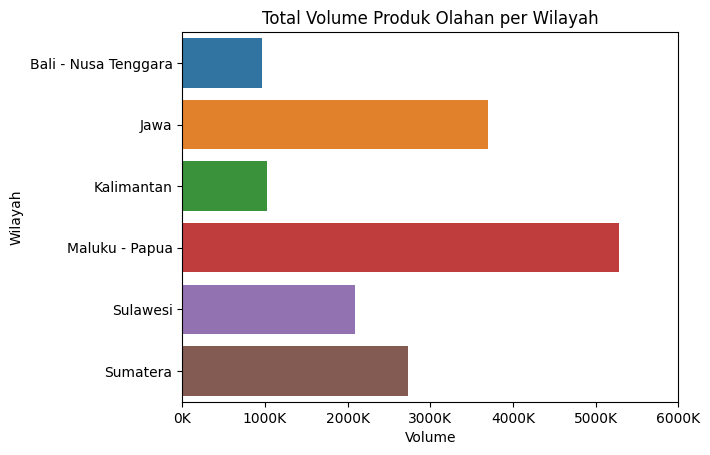

In [59]:
volume_wilayah=poi.groupby('Wilayah')['Volume'].sum()
df_vw=volume_wilayah.reset_index()
g=sns.barplot(x='Volume', y='Wilayah', data=df_vw)
g.set(xlim = (0,6000000))
xlabels = ['{:.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)
plt.title('Total Volume Produk Olahan per Wilayah')
plt.show()

In [34]:
df_vw

,Wilayah,Volume
0,Bali - Nusa Tenggara,959970
1,Jawa,3695715
2,Kalimantan,1029138
3,Maluku - Papua,5278232
4,Sulawesi,2088832
5,Sumatera,2725556


##Tahun Berapa dan Jenis Olahan Ikan apa yang paling banyak diproduksi?

In [32]:
jenisolahan_pertahun=poi.groupby(['Tahun','JenisOlahan'])['Volume'].sum()
df_jopt=jenisolahan_pertahun.reset_index()
df_jopt.head()

,Tahun,JenisOlahan,Volume
0,2001,ikan asap,36561
1,2001,ikan beku,307235
2,2001,ikan kalengan,25299
3,2001,ikan kering/asin,584394
4,2001,ikan olahan lainnya,30158


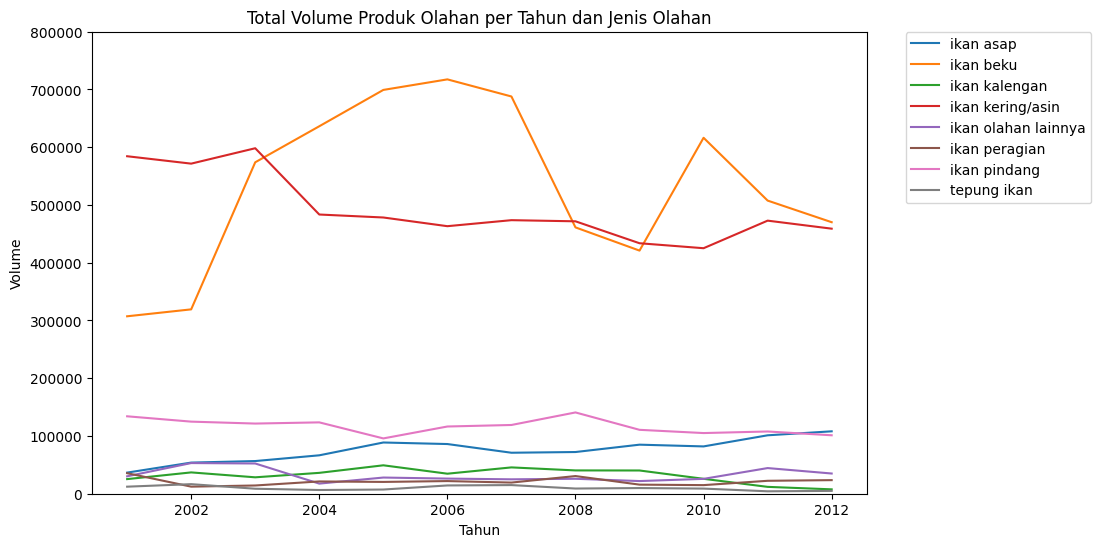

In [42]:
plt.figure(figsize=(10,6))
g=sns.lineplot(x='Tahun', y='Volume', hue='JenisOlahan', data=df_jopt)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.set(ylim = (0,800000))
plt.title('Total Volume Produk Olahan per Tahun dan Jenis Olahan')
plt.show()

In [49]:
sort_jopt = df_jopt.sort_values('Volume', ascending=False)
sort_jopt.head(6)

,Tahun,JenisOlahan,Volume
41,2006,ikan beku,717486
33,2005,ikan beku,699224
49,2007,ikan beku,687862
25,2004,ikan beku,636303
73,2010,ikan beku,616361
19,2003,ikan kering/asin,598235


##Jenis Olahan Ikan Tertinggi di Wilayah Jawa

In [54]:
df_jawa=poi[poi['Wilayah']=='Jawa']
jenisolahan_jawa=df_jawa.groupby(['Wilayah', 'JenisOlahan'])['Volume'].sum().reset_index()
jenisolahan_jawa

,Wilayah,JenisOlahan,Volume
0,Jawa,ikan asap,277094
1,Jawa,ikan beku,501223
2,Jawa,ikan kalengan,129907
3,Jawa,ikan kering/asin,1528842
4,Jawa,ikan olahan lainnya,183851
5,Jawa,ikan peragian,73117
6,Jawa,ikan pindang,951845
7,Jawa,tepung ikan,49836


<ipython-input-58-e78d1934e254>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


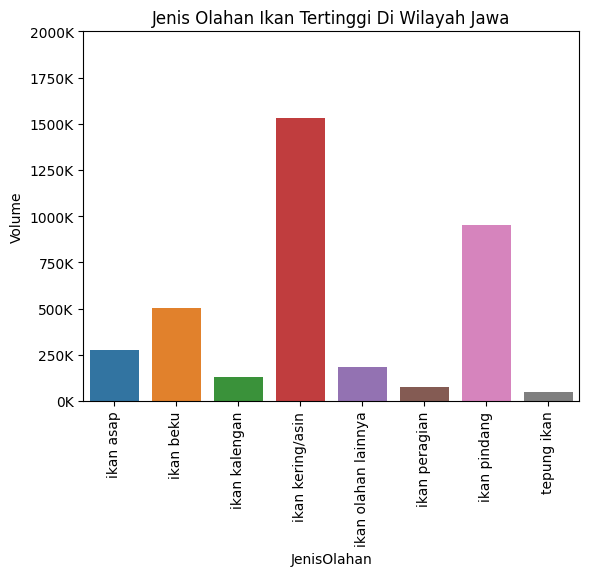

In [58]:
g=sns.barplot(x='JenisOlahan', y='Volume', data=jenisolahan_jawa)
g.set(ylim = (0,2000000))
ylabels = ['{:.0f}'.format(y) + 'K' for y in g.get_yticks()/1000]
g.set_yticklabels(ylabels)
plt.xticks(rotation=90)
plt.title('Jenis Olahan Ikan Tertinggi Di Wilayah Jawa')
plt.show()

##TOP 10 Jenis Olahan Ikan

In [67]:
jenisolahan=poi.groupby('JenisOlahan')['Volume'].sum().reset_index()
sort_jenisolahan=jenisolahan.sort_values('Volume', ascending=False).head(5)
sort_jenisolahan

,JenisOlahan,Volume
1,ikan beku,6417528
3,ikan kering/asin,5915315
6,ikan pindang,1400541
0,ikan asap,907530
4,ikan olahan lainnya,385192


<ipython-input-66-16b719044df7>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


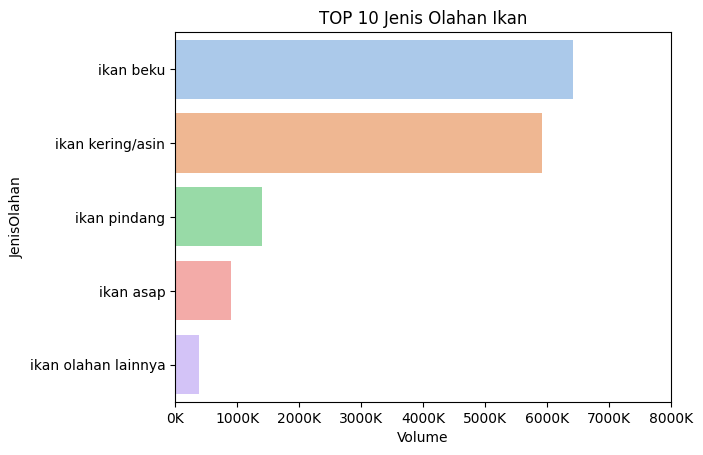

In [66]:
g=sns.barplot(data=sort_jenisolahan, y='JenisOlahan', x='Volume', palette='pastel')
g.set(xlim = (0,8000000))
xlabels = ['{:.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)
plt.title('TOP 10 Jenis Olahan Ikan')
plt.show()

##TOP 10 Provinsi Penghasil Olahan Ikan

In [69]:
provinsi=poi.groupby('NamaProvinsi')['Volume'].sum().reset_index()
provinsi=provinsi.sort_values('Volume', ascending=False).head(10)
provinsi

,NamaProvinsi,Volume
18,Maluku,2719184
22,Papua,1765368
10,Jawa Timur,1584248
32,Sumatera Utara,1244524
9,Jawa Tengah,971244
29,Sulawesi Utara,850369
8,Jawa Barat,673559
26,Sulawesi Selatan,497781
12,Kalimantan Selatan,465646
19,Maluku Utara,464631


<ipython-input-72-193d8dcdb270>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


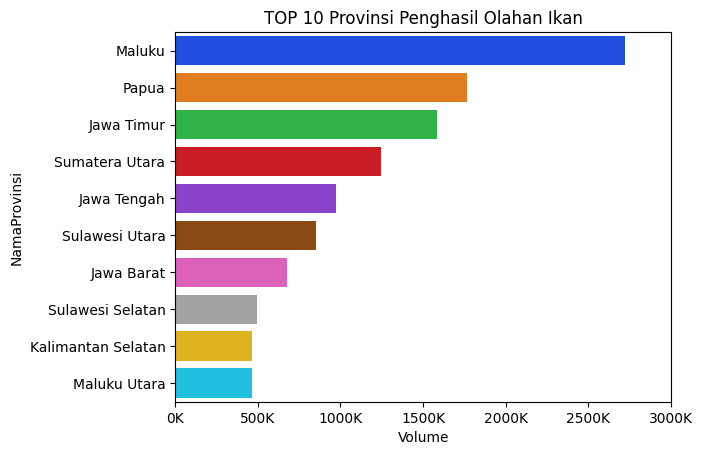

In [72]:
g=sns.barplot(data=provinsi, y='NamaProvinsi', x='Volume', palette='bright')
g.set(xlim = (0,3000000))
xlabels = ['{:.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)
plt.title('TOP 10 Provinsi Penghasil Olahan Ikan')
plt.show()

In [77]:
perairan=poi.groupby(['JenisPerairan', 'JenisOlahan'])['Volume'].sum().reset_index()
perairan

,JenisPerairan,JenisOlahan,Volume
0,Laut,ikan asap,844474
1,Laut,ikan beku,6413811
2,Laut,ikan kalengan,382104
3,Laut,ikan kering/asin,5551028
4,Laut,ikan olahan lainnya,363624
5,Laut,ikan peragian,249106
6,Laut,ikan pindang,1395398
7,Laut,tepung ikan,117146
8,Umum,ikan asap,63056
9,Umum,ikan beku,3717


<ipython-input-81-2fa597b575d7>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


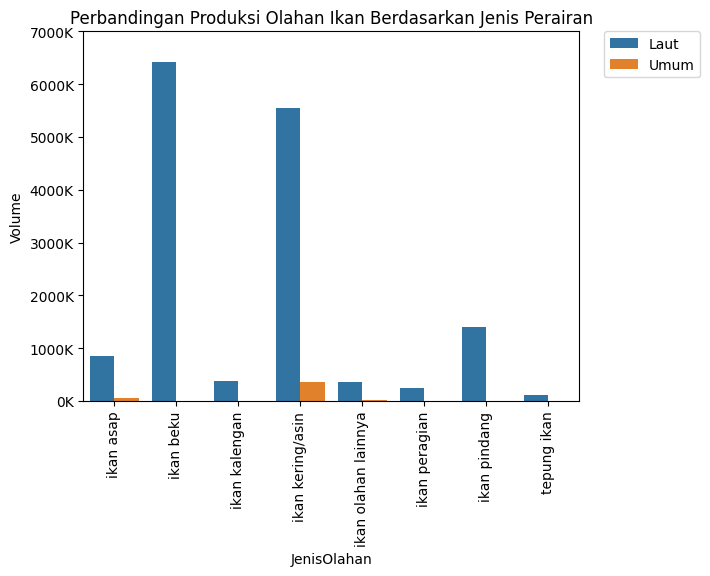

In [81]:
g=sns.barplot(data=perairan, x='JenisOlahan', y='Volume', hue='JenisPerairan')
g.set(ylim = (0,7000000))
ylabels = ['{:.0f}'.format(y) + 'K' for y in g.get_yticks()/1000]
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.set_yticklabels(ylabels)
plt.xticks(rotation=90)
plt.title('Perbandingan Produksi Olahan Ikan Berdasarkan Jenis Perairan')
plt.show()